## Background

The data were collected by a software company through a mobile app. The mobile app offers routine measurement of patient symptoms to multiple clinic sites all over the United States. It collects a hybrid of clinical observations and provides clinical data-tracking and clinician feedback features that assists clinicians in improving health care. Patients were asked to finish the measurements before every psychotherapy session. The measurements include a therapy-directed scale, a Computer Adaptive Multidimensional Scale (CAMS) and some commonly used psychotherapy scales for common disorders, such as the Generalized anxiety disorder (GAD) scale, the Patient Health Questionnaire (PHQ-9), and the Post Traumatic Stress Disorder Checklist (PCL).

The primary data used to demonstrate the analysis in this project were collected in several clinical psychotherapy sites in California since 2017. The ages of the participants range from 11-69. Because the CAMS measurement was designed for adult, only adult patients were selected in the data processing of this project. For security, the data have been de-identified. Personally identifiable information, such as name and birth date, were removed by the data provider.  

The CAMS measurement combines 70 questions on symptoms, functioning, and behaviors across 17 dimensions to produce a broad overview of an adult patient's mental health. All the questions are 7-point Likert-scale questions, ranging from 1 to 7, representing strongly disagree to strongly agree. Its 17 subscales measure Attachment, Avoidance, Connectedness, Hopelessness, Eating Problems, Emotional Distancing, Hurtful Rumination, Hypervigilance, Perfectionism, Pressure from Negative Affect, Psychosis, Resilience, Social Role, Relational Distress, Somatic Anxiety, Substance Use, and Suicide Risk. The scaled scores for the 17 dimensions were included in this project. 

The therapy-directed scale includes 8 questions for 2 dimensions, theraputic alliance and therapy preferences(expressedTherapyNeeds). The questions for theraputic alliance are also 7-point Likert-scale questions, ranging from 1 to 7, representing strongly disagree to strongly agree. And the questions for therapy preferences are sliding-scale questions, ranging from -5 to 5. The higher the scaled score is, the more the expressed therapy needs are. The scaled scores for these 2 dimensions were also included in the current project.

The PHQ-9 is a multipurpose instrument for screening, diagnosing, monitoring and measuring the severity of depression. Usually, the clinicians use the sum score of 9 questions for provisional diagnosis of major depression. The data used for this project involved the patients' scores for 9 questions. The sum scores and the diagnosis for the patients were calculated in the data processing. 



## Data processing

The data processing included 8 steps:
1. Selecting the subjects whose 'performerRelation' is patient;  
2. Selecting the columns that are related to CAMS measurement, therapy-directed scale, and the Patient Health Questionnaire (PHQ-9), as well as the columns about relevant demographics(birthyear, gender, etc.);
3. Calculating the subjects' age based on their birth year and selecting the subjects older than 18;
4. Removing rows that contain NA value;
5. Revising the column names: for the columns whose name contains'.raw', I removed the '.raw';
6. For PHQ-9, calculating the sum of 9 questions to get the total severity score of major depression;
7. Then binning 'phqScore' and adding the diagnosis of major depression based on the scale;
8. Select every patient's first visit.


In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#import data
dataset = pd.read_csv('../dataset.csv')

C:\Users\Rachel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (11,67,68,69,71,73,74,75,76,81,83,84,85,86,87,89,90,91,97,98,100,101,102,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,272,273,274,275,276) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#1) choose the subjects whose 'performerRelation' is patient;  
dataset = dataset[dataset['performerRelation'] == 'patient']
#2) select the columns that are related to CAMS measurement and the Patient Health Questionare(PHQ-9) as well as columns about relevant demographics
dataset = dataset.loc[:,['questionnaireStatus','subjectGender','subjectBirthYear','subjectMirahId','appointmentDate','performerRelation','alliance.raw','attachment.raw','avoidance.raw','connectedness.raw','emotionalDistance.raw',
'eating.raw','expressedTherapyNeeds.raw','demoralization.raw','hypervigilance.raw','medicationThoughts.raw','negativeAffect.raw',
'perfectionism.raw','psychosis.raw','relationalDistress.raw','resilience.raw','hurtfulRumination.raw','socialRole.raw','somaticAnxiety.raw',
'substanceUse.raw','suicideRisk.raw','phq9littleInterestPleasure','phq9DownDepressedHopeless','phq9TroubleSleeping','phq9feelingTired',
'phq9appetiteOvereating','phq9feelingBadAboutSelf','phq9troubleConcentrating','phq9movingQuicklySlowly','phq9betterOffDead','phq9problemImpact']]
#3) calculate the subjects' age based on their birth year and select the subjects older than 18;  
dataset['subjectAge'] = 2017 - dataset['subjectBirthYear']
dataset = dataset[dataset['subjectAge'] >= 18]

In [4]:
#4) Remove rows that contain NA value.
dataset = dataset.dropna()
#5) For the columns whose name contains'.raw', remove the '.raw'.
dataset = dataset.rename(columns = lambda x: x.split('.')[0])
#6) For PHQ-9, we need to calculate the sum of first 9 questions to get the total severity score of depression.
dataset['phqScore']=dataset.loc[:,['phq9littleInterestPleasure','phq9DownDepressedHopeless','phq9TroubleSleeping','phq9feelingTired','phq9appetiteOvereating','phq9feelingBadAboutSelf','phq9troubleConcentrating','phq9movingQuicklySlowly','phq9betterOffDead']].sum(axis=1)
#7) Then we can bin 'phqScore' and add the diagnosis of major depression based on the scale.
bins = [-1, 5, 10, 15, 20, 30]
DepLabel = ['no depression', 'minimal symptoms','minor depression', 'moderate depression', 'severe depression']
dataset['depression'] = pd.cut(dataset.phqScore, bins, 
                         labels= DepLabel)
#8) Select every patient's first visit.
data = dataset.groupby('subjectMirahId').first().reset_index()

## Analysis

Understanding patients' needs for therapy is essential for therapists and clinicians to provide necessary service and improve their clinical practice. The primary dependent variable in this project is Expressed Therapy Needs.


The first question of this project was investigating the gender differences of Expressed Therapy Needs.

**Question 1:** Is there any difference of the *expressed therapy needs* between male and female?

First, I used a bar chart comparing the mean and distribution of expressed therapy needs between male and female patients.

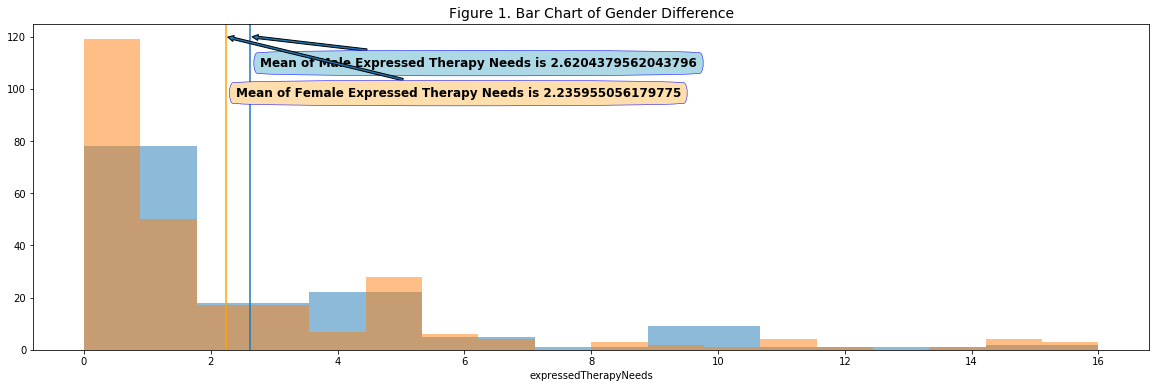

In [5]:
fig, ax = plt.subplots(figsize = (20,6)) 
male = data[data.subjectGender=='M']
female = data[data.subjectGender=='F']
avgMNeeds = male.expressedTherapyNeeds.mean()
avgFNeeds = female.expressedTherapyNeeds.mean()
sns.distplot(male.expressedTherapyNeeds, 
             kde=False, hist_kws={'alpha':.5})
plt.axvline(avgMNeeds)
sns.distplot(female.expressedTherapyNeeds, 
             kde=False, hist_kws={'alpha':.5})
plt.axvline(avgFNeeds, color='orange')
plt.title('Figure 1. Bar Chart of Gender Difference', fontsize=14)
male_mean = 'Mean of Male Expressed Therapy Needs is {}'.format(avgMNeeds)
female_mean = 'Mean of Female Expressed Therapy Needs is {}'.format(avgFNeeds)
bbox_props1 = dict(boxstyle='round4, pad=0.6', fc='lightblue', ec='b', lw=.5)
ax.annotate(male_mean,             
            fontsize=12,
            fontweight='demi',
            xy=(avgMNeeds, 120),  
            xycoords='data',
            xytext=(10, -30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="simple",), bbox=bbox_props1)
bbox_props2 = dict(boxstyle='round4, pad=0.6', fc='navajowhite', ec='b', lw=.5)
ax.annotate(female_mean,             
            fontsize=12,
            fontweight='demi',
            xy=(avgFNeeds, 120),  
            xycoords='data',
            xytext=(10, -60),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="simple",), bbox=bbox_props2)

plt.show()

Then I conducted a 2-sided t-test.

**Null Hypothesis:** There is no difference of the *expressed therapy needs* between male and female.  
**Alternative Hypothesis:**  There is significant difference of the *expressed therapy needs* between male and female.

In [6]:
tstat, pval = stats.ttest_ind(male.expressedTherapyNeeds, female.expressedTherapyNeeds)
print(pval)

0.2892617547681946


With p-value = 0.289 > 0.05, we could not reject the null hypothesis. So there is no significant difference of the *expressed therapy needs* between male and female.

The second question of this project was comparing the means of expressed therapy needs among different groups of major depression diagnosis.

**Question 2:** Is there any difference of the *expressed therapy needs*  among different groups of major depression diagnosis?

First, I also used a bar chart comparing the means among groups

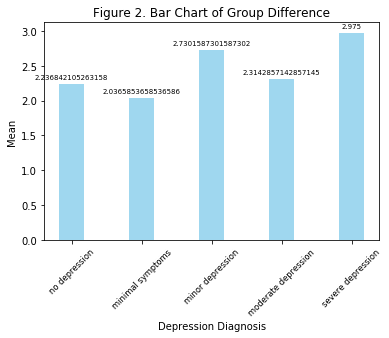

In [7]:
y = data.groupby('depression')['expressedTherapyNeeds'].mean()
x = np.arange(5)
xticks1=list(DepLabel)
plt.bar(x,y,width = 0.35,align='center',color = 'skyblue',alpha=0.8)
plt.xticks(x,xticks1,size='small',rotation=45)
plt.xlabel('Depression Diagnosis')
plt.ylabel('Mean')
plt.title('Figure 2. Bar Chart of Group Difference')
for a,b in zip(x,y):
    plt.text(a, b+0.05, b, ha='center', va= 'bottom',fontsize=7)
plt.show()

Because I have more than 2 groups, I conducted an ANOVA to compare the group differences. 

In [8]:
results = ols('expressedTherapyNeeds ~ C(depression)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     expressedTherapyNeeds   R-squared:                       0.007
Model:                               OLS   Adj. R-squared:                 -0.003
Method:                    Least Squares   F-statistic:                    0.7185
Date:                   Fri, 20 Dec 2019   Prob (F-statistic):              0.580
Time:                           21:55:04   Log-Likelihood:                -1071.4
No. Observations:                    404   AIC:                             2153.
Df Residuals:                        399   BIC:                             2173.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.2368      0.323      6.916      0.000       1.601       2.873
C(depression)[T.minor depression]       -0.2003      0.500     -0.401      0.689      -1.183       0.783
C(depression)[T.moderate depression]     0.4933      0.542      0.910      0.363      -0.572       1.559
C(depression)[T.no depression]           0.0774      0.467      0.166      0.868      -0.841       0.996
C(depression)[T.severe depression]       0.7382      0.635      1.163      0.245      -0.509       1.986
==============================================================================
Omnibus:                      163.687   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.621
Skew:                           1.943   Prob(JB):                    1.45e-108
Kurtosis:                       6.795   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(depression),34.270401,4.0,0.718542,0.579635
Residual,4757.511777,399.0,NaN,NaN


Overall the model was not significiant, F(4,399)= 0.7185, p = 0.580. This indicated that there was no significant differences in the group means.

The third question was trying to build multiple linear regression model for expressed therapy needs.

**Question 3:** Can we use the demographics and variables from CAMS to explain and model the expressed therapy needs by multiple linear regression?

If we could model the expressed therapy needs, it would be helpful for clinicians to target the patients who have higher therapy need based on certain symptoms or behaviors, especially when we can not get the patients' feedbacks in time. 

First, I calculated the correlation matrix to find the variables related to expressed therapy needs.

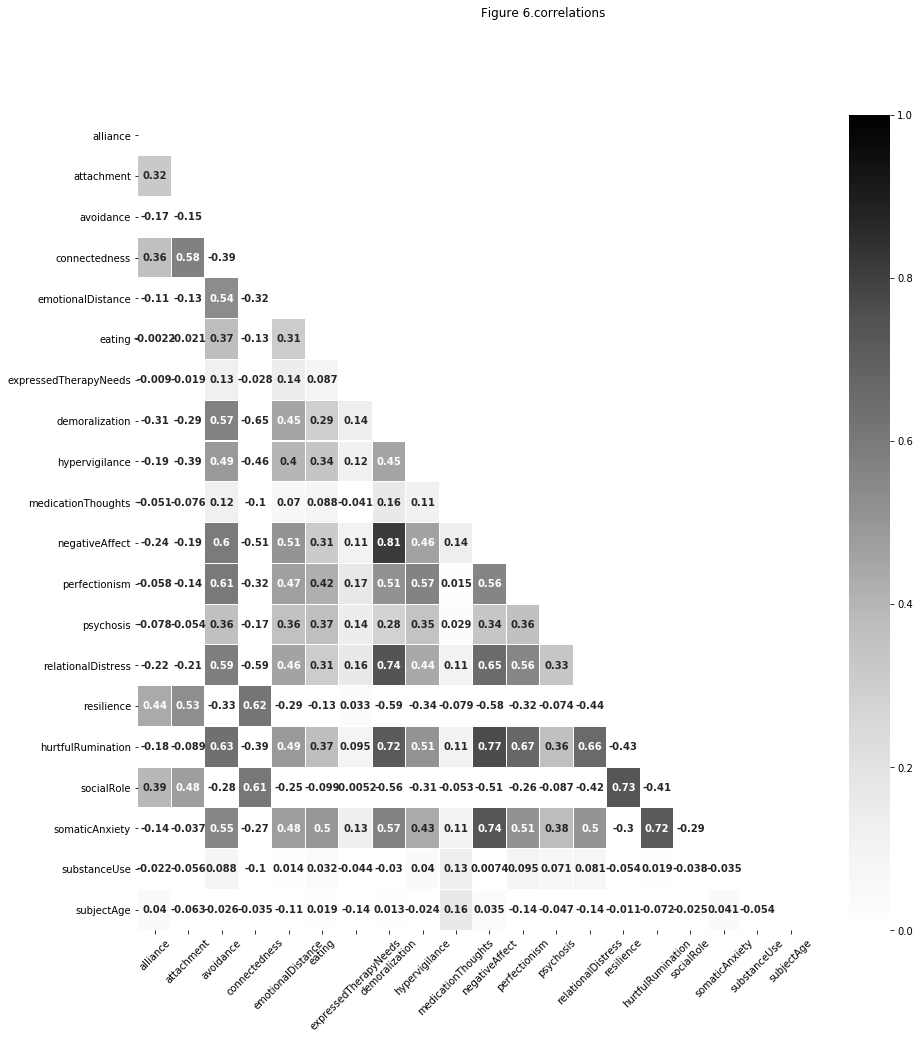

In [10]:
correlations = data.iloc[:,np.r_[6:25,36]].corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlations,cmap=plt.cm.Greys, mask=mask, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})
plt.xticks(rotation=45)
plt.suptitle('Figure 6.correlations')
plt.show()

The variables which have Pearson's correlation larger than 0.2 with *expressedTherapyNeeds* were considered being correlated with *expressedTherapyNeeds* and were included in the first baseline model.

In [11]:
X = data[['somaticAnxiety','socialRole','hurtfulRumination','resilience','relationalDistress','psychosis','perfectionism','negativeAffect','hypervigilance']]
Y = data ['expressedTherapyNeeds']

In [12]:
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()

C:\Users\Rachel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     expressedTherapyNeeds   R-squared:                       0.064
Model:                               OLS   Adj. R-squared:                  0.043
Method:                    Least Squares   F-statistic:                     2.995
Date:                   Fri, 20 Dec 2019   Prob (F-statistic):            0.00182
Time:                           21:55:05   Log-Likelihood:                -1059.5
No. Observations:                    404   AIC:                             2139.
Df Residuals:                        394   BIC:                             2179.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3473      1.403     -1.673      0.095      -5.106       0.411
somaticAnxiety         0.1330      0.172      0.772      0.441      -0.206       0.472
socialRole            -0.0676      0.184     -0.366      0.714      -0.430       0.295
hurtfulRumination     -0.3917      0.219     -1.788      0.074      -0.822       0.039
resilience             0.4985      0.242      2.063      0.040       0.023       0.974
relationalDistress     0.3768      0.175      2.154      0.032       0.033       0.721
psychosis              0.1599      0.152      1.052      0.293      -0.139       0.459
perfectionism          0.3662      0.196      1.864      0.063      -0.020       0.753
negativeAffect         0.1822      0.271      0.671      0.502      -0.351       0.716
hypervigilance         0.0753      0.171      0.441      0.659      -0.260       0.411
==============================================================================
Omnibus:                      153.332   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.950
Skew:                           1.824   Prob(JB):                     1.46e-97
Kurtosis:                       6.631   Cond. No.                         95.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can tell from the table above that *somaticAnxiety*, *socialRole*, *psychosis*, *negativeAffect*, and *hypervigilance* were not significant factors with a significance level of 90%. I removed these variables and fitted the model again.

In [14]:
X_1 = data[['hurtfulRumination','resilience','relationalDistress','psychosis','perfectionism']]
X = sm.add_constant(X_1) # adding a constant
model_1 = sm.OLS(Y, X).fit()

In [15]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     expressedTherapyNeeds   R-squared:                       0.058
Model:                               OLS   Adj. R-squared:                  0.047
Method:                    Least Squares   F-statistic:                     4.939
Date:                   Fri, 20 Dec 2019   Prob (F-statistic):           0.000213
Time:                           21:55:05   Log-Likelihood:                -1060.7
No. Observations:                    404   AIC:                             2133.
Df Residuals:                        398   BIC:                             2157.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7692      1.137     -1.555      0.121      -4.005       0.467
hurtfulRumination     -0.2056      0.179     -1.146      0.253      -0.558       0.147
resilience             0.3768      0.173      2.179      0.030       0.037       0.717
relationalDistress     0.4191      0.169      2.474      0.014       0.086       0.752
psychosis              0.2047      0.148      1.387      0.166      -0.085       0.495
perfectionism          0.3955      0.185      2.139      0.033       0.032       0.759
==============================================================================
Omnibus:                      155.543   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.775
Skew:                           1.846   Prob(JB):                    2.39e-100
Kurtosis:                       6.691   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the second table, I found that *hurtfulRumination* and *psychosis* were not significant factors with a significance level of 95%. I removed these two variables and fitted a model with *resilience*, *relationalDistress*, and *perfectionism*.

In [16]:
X_2 = data[['resilience','relationalDistress','perfectionism']]
X = sm.add_constant(X_2) # adding a constant
model_2 = sm.OLS(Y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     expressedTherapyNeeds   R-squared:                       0.052
Model:                               OLS   Adj. R-squared:                  0.045
Method:                    Least Squares   F-statistic:                     7.262
Date:                   Fri, 20 Dec 2019   Prob (F-statistic):           9.39e-05
Time:                           21:55:05   Log-Likelihood:                -1062.1
No. Observations:                    404   AIC:                             2132.
Df Residuals:                        400   BIC:                             2148.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2073      1.099     -2.008      0.045      -4.369      -0.046
resilience             0.4401      0.169      2.611      0.009       0.109       0.772
relationalDistress     0.3854      0.154      2.499      0.013       0.082       0.688
perfectionism          0.3490      0.161      2.167      0.031       0.032       0.666
==============================================================================
Omnibus:                      158.857   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.867
Skew:                           1.879   Prob(JB):                    1.04e-104
Kurtosis:                       6.786   Cond. No.                         45.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As indicated in the third table, the third model was significant, F(3,400)= 7.262, p << 0.05. We have: **expressedTherapyNeeds(resilience,relationalDistress,perfectionism) = -2.2073 + 0.4401resilience + 0.3854relationalDistress + 0.3490perfectionism**.

But the r-square indicated that only 5.2% the variation in *expressedTherapyNeeds* was explained by the model. So I tested the assumptions of residuals with residuals plotted against each predictor variable and the predicted values.

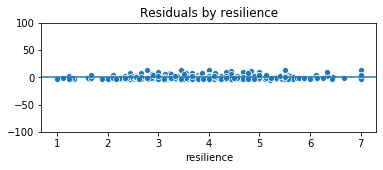

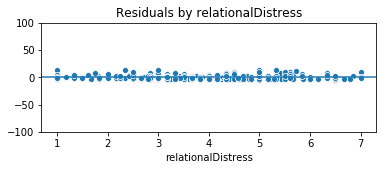

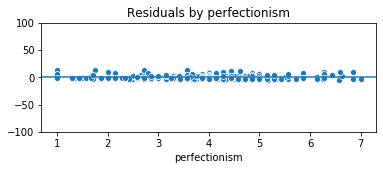

In [17]:
for x in ('resilience','relationalDistress','perfectionism'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(data[x], model_2.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(model_2.resid))
    plt.show()



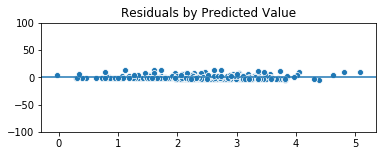

In [18]:
plt.figure(figsize=(6,2))
sns.scatterplot(model_2.predict(), model_2.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(model_2.resid))
plt.show()


Mean:  2.7524737164964278e-15


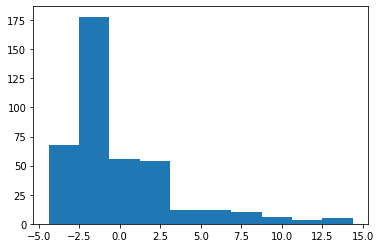

In [19]:
print("Mean: ",np.mean(model_2.resid))
plt.hist(model_2.resid)
plt.show()

The plots above show that residuals against each predictor variable and the predicted values have a mean close to 0 across the distribution and the calculation shows the mean to the residuals against the predicted values is 2.7524737164964278e-15, which is very close to 0.

The results of multiple linear regression indicated that *resilience*, *relationalDistress*, and *perfectionism* are important factors to predict individual's therapy needs. This finding has important implications for understanding patients' therapy needs to improve clinical practice in the future.